In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

In [2]:
df = pd.read_csv('matches.csv', index_col='date', parse_dates=['date'])
print(df.shape)
df.head()

(756, 17)


,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
date,,,,,,,,,,,,,,,,,
2017-04-05,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2017-04-06,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2017-04-07,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
2017-04-08,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
2017-04-08,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 1. Handling Missing Values

In [3]:
df.isnull().sum()

id                   0
season               0
city                 7
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

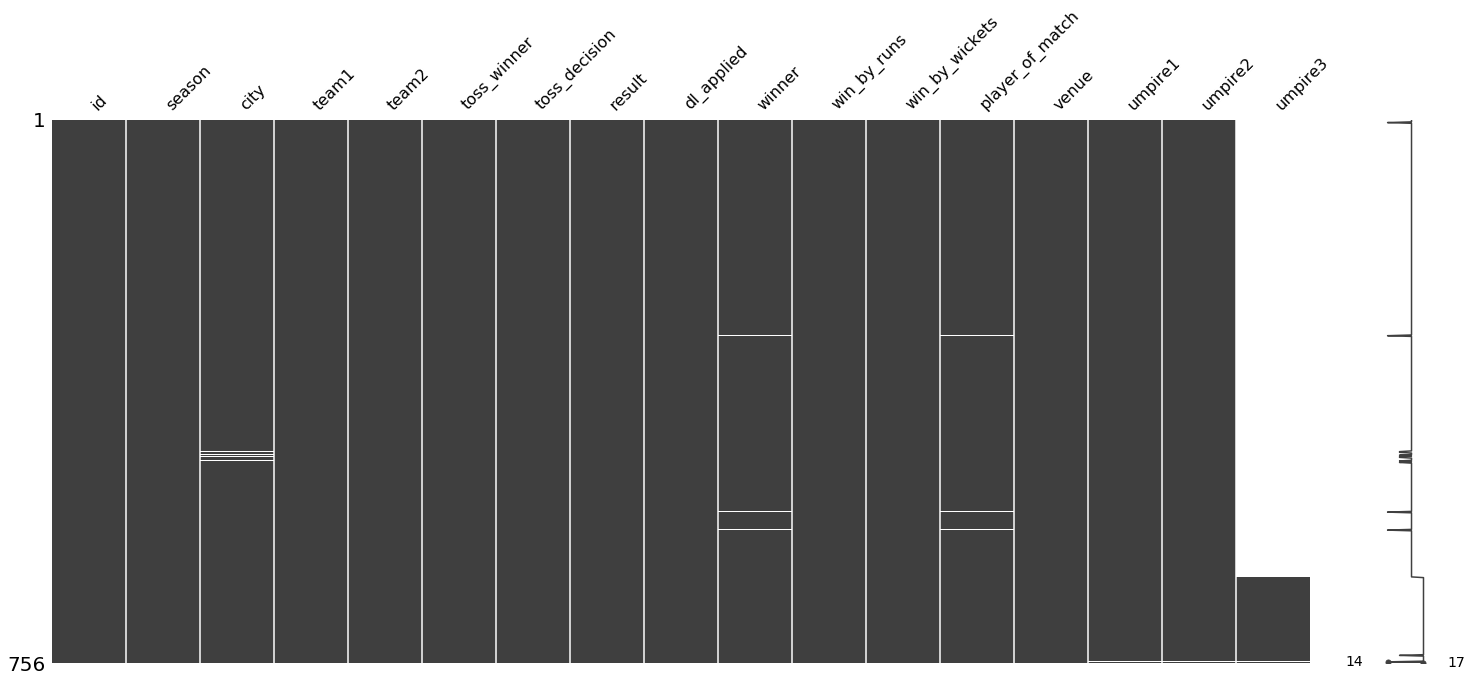

In [4]:
msno.matrix(df)

#### Since "umpire3" contains all NaN values, we can drop it

In [5]:
df=df.drop(columns=['umpire3', 'id'])
df=df.fillna(method='ffill')

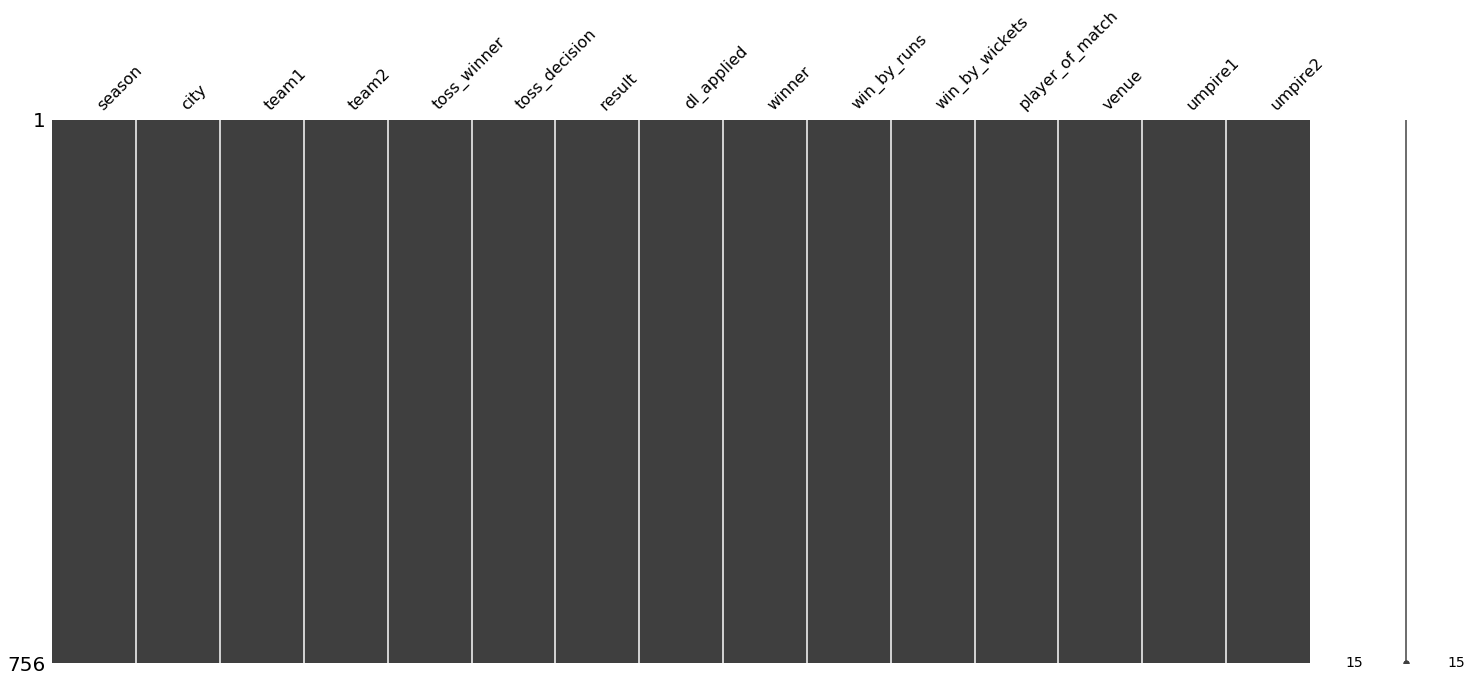

In [6]:
msno.matrix(df)
plt.show()

# 2. Data Analysis

### 2.1) Matches in every season

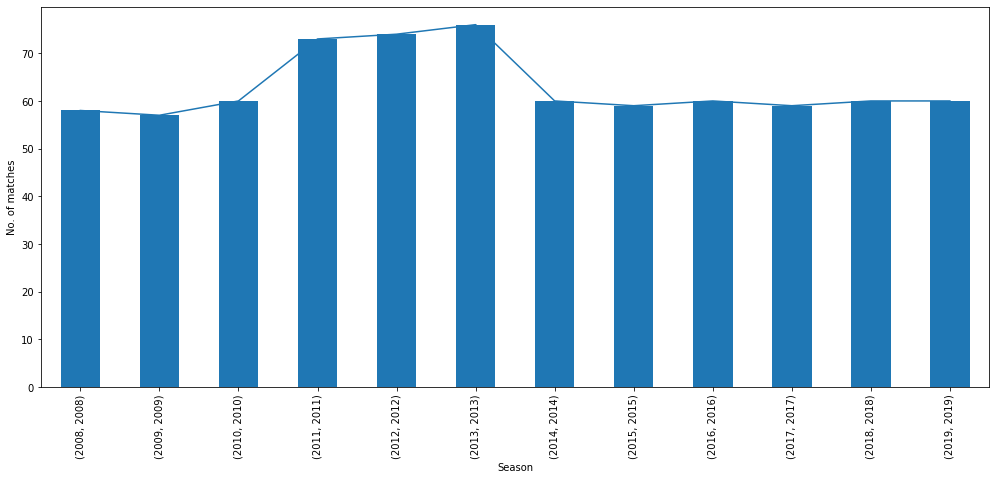

In [7]:
plt.figure(figsize=(17,7))
df.groupby('season')['season'].value_counts().plot()
df.groupby('season')['season'].value_counts().plot.bar()
plt.xlabel('Season')
plt.ylabel('No. of matches')
plt.show()

### 2.2) Total No. of wins by each team

In [10]:
wins = pd.DataFrame(df['winner'].value_counts())
wins['name']=wins.index

In [20]:
wins

,winner,name
Mumbai Indians,109,Mumbai Indians
Chennai Super Kings,100,Chennai Super Kings
Kolkata Knight Riders,93,Kolkata Knight Riders
Royal Challengers Bangalore,84,Royal Challengers Bangalore
Kings XI Punjab,82,Kings XI Punjab
Rajasthan Royals,76,Rajasthan Royals
Delhi Daredevils,67,Delhi Daredevils
Sunrisers Hyderabad,59,Sunrisers Hyderabad
Deccan Chargers,30,Deccan Chargers
Gujarat Lions,13,Gujarat Lions


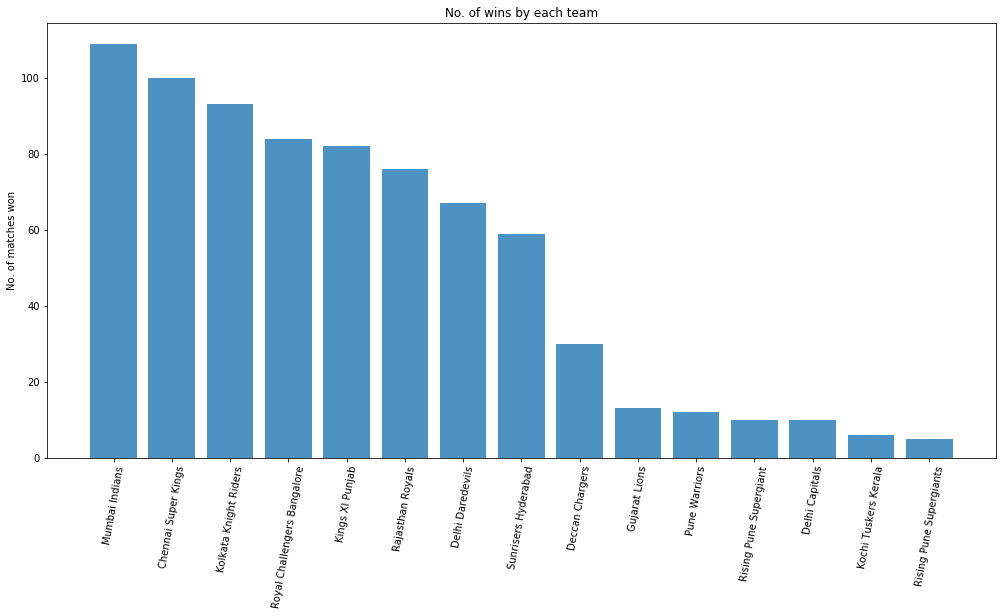

In [17]:
plt.figure(figsize=(17,8))
plt.bar(wins['name'], wins['winner'], alpha=0.8)
plt.xticks(rotation=80)
plt.title('No. of wins by each team')
plt.ylabel('No. of matches won')
plt.xlabel(None)
plt.show()